In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
log_df = pd.read_csv('log_mini.csv')
tf_df = pd.read_csv('tf_mini.csv')

/var/folders/fw/slnm06yn15lgwlcg_7jpt3t00000gn/T/ipykernel_81671/472057057.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_df_s_mean = log_df.groupby(['session_id']).mean()


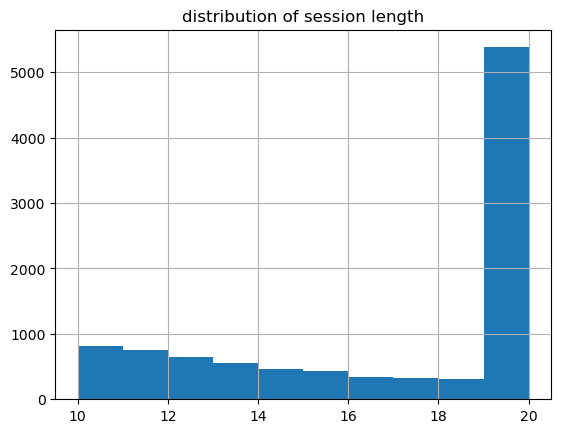

In [3]:
log_df_s_mean = log_df.groupby(['session_id']).mean()
log_df_s_mean['session_length'].hist()
plt.title('distribution of session length')
plt.show()

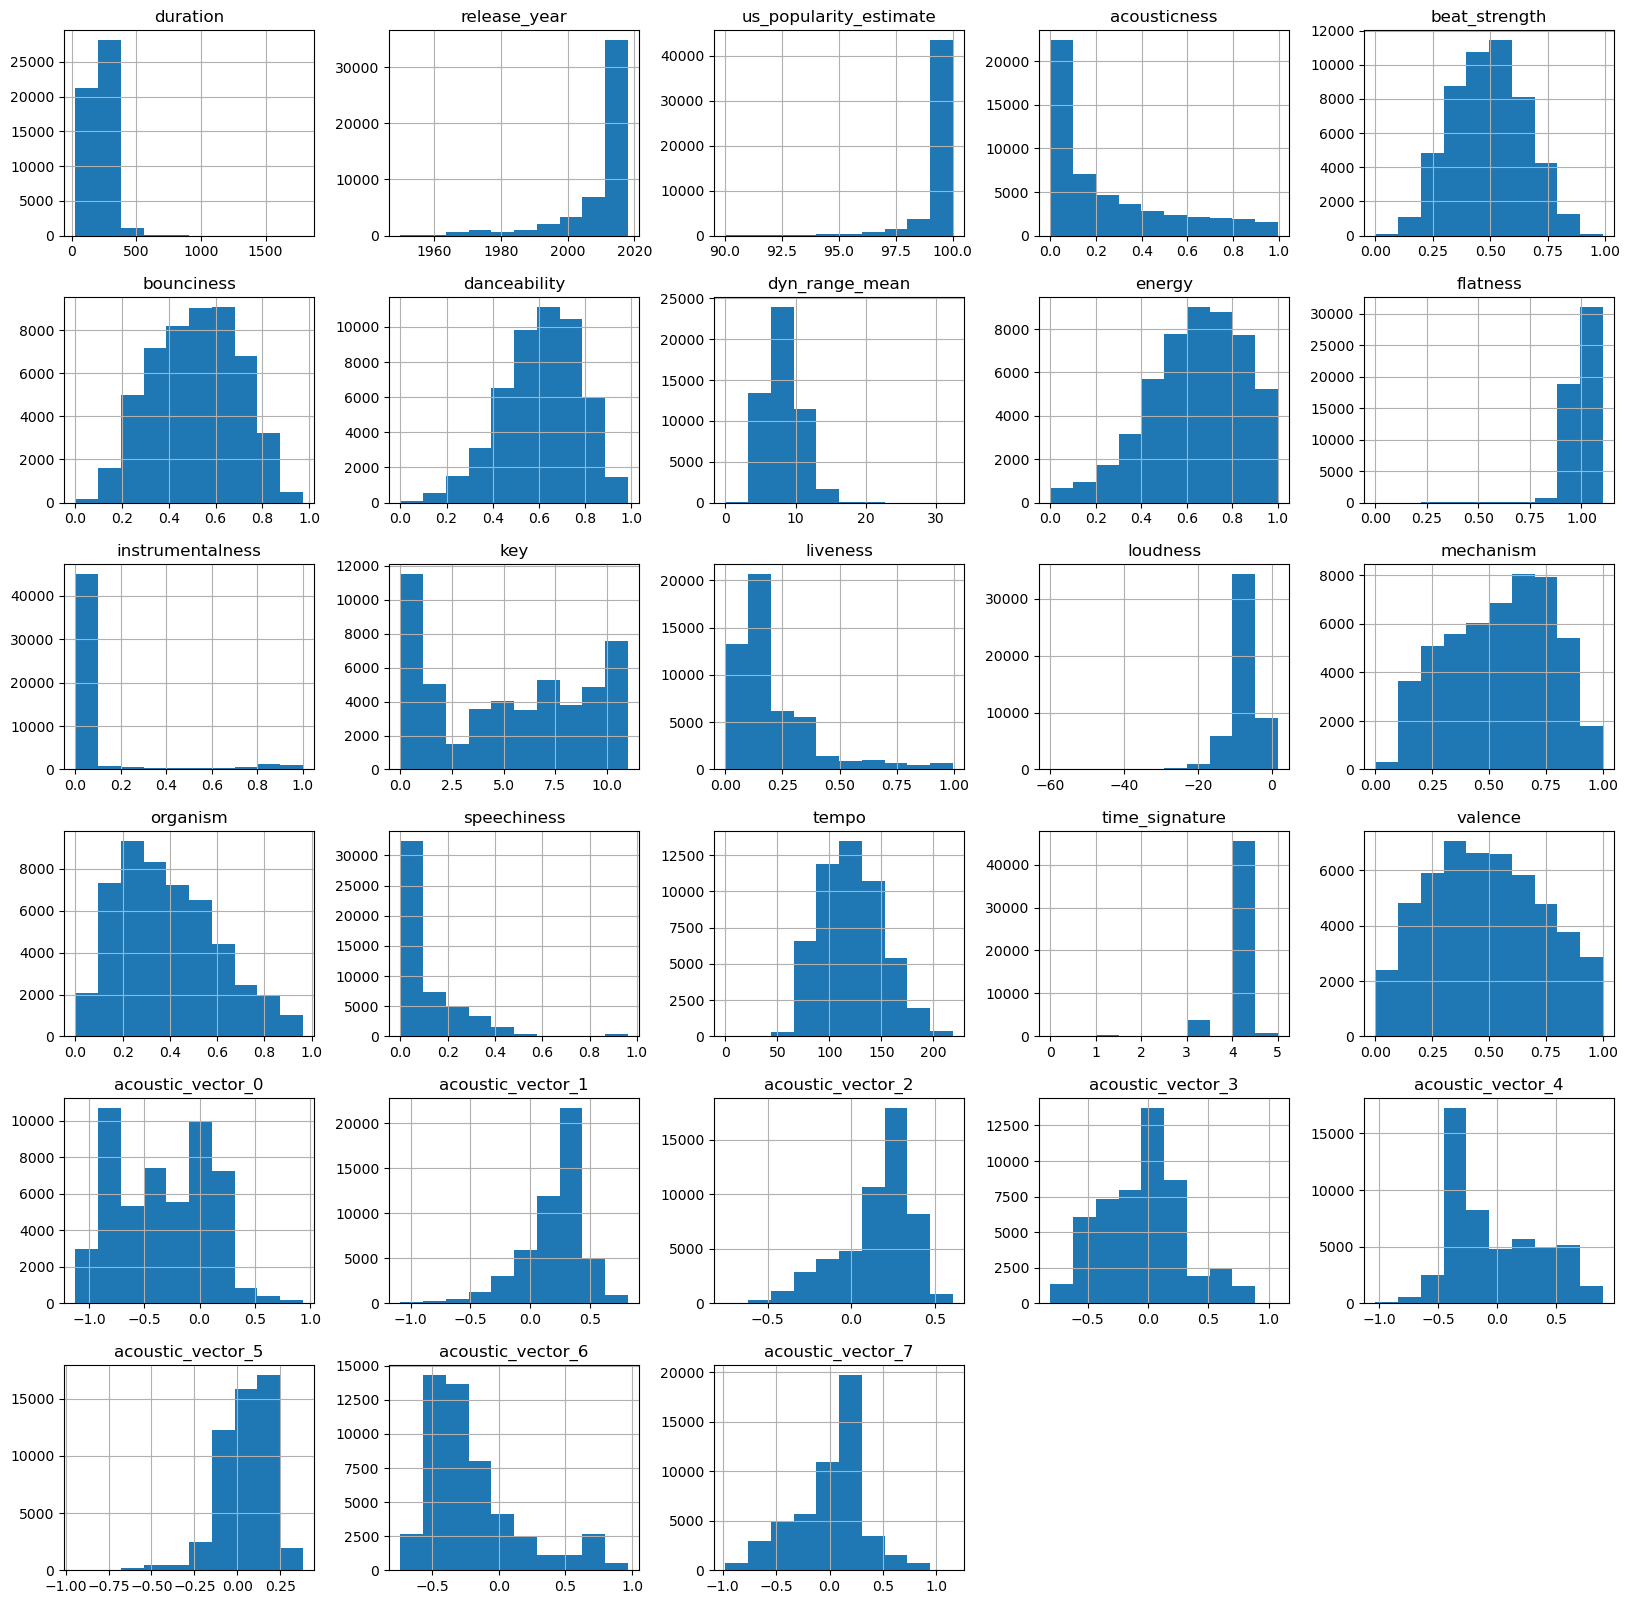

In [4]:
tf_hist = tf_df.hist(figsize = (20,20))

/var/folders/fw/slnm06yn15lgwlcg_7jpt3t00000gn/T/ipykernel_81671/1037090394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( tf_df.corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)


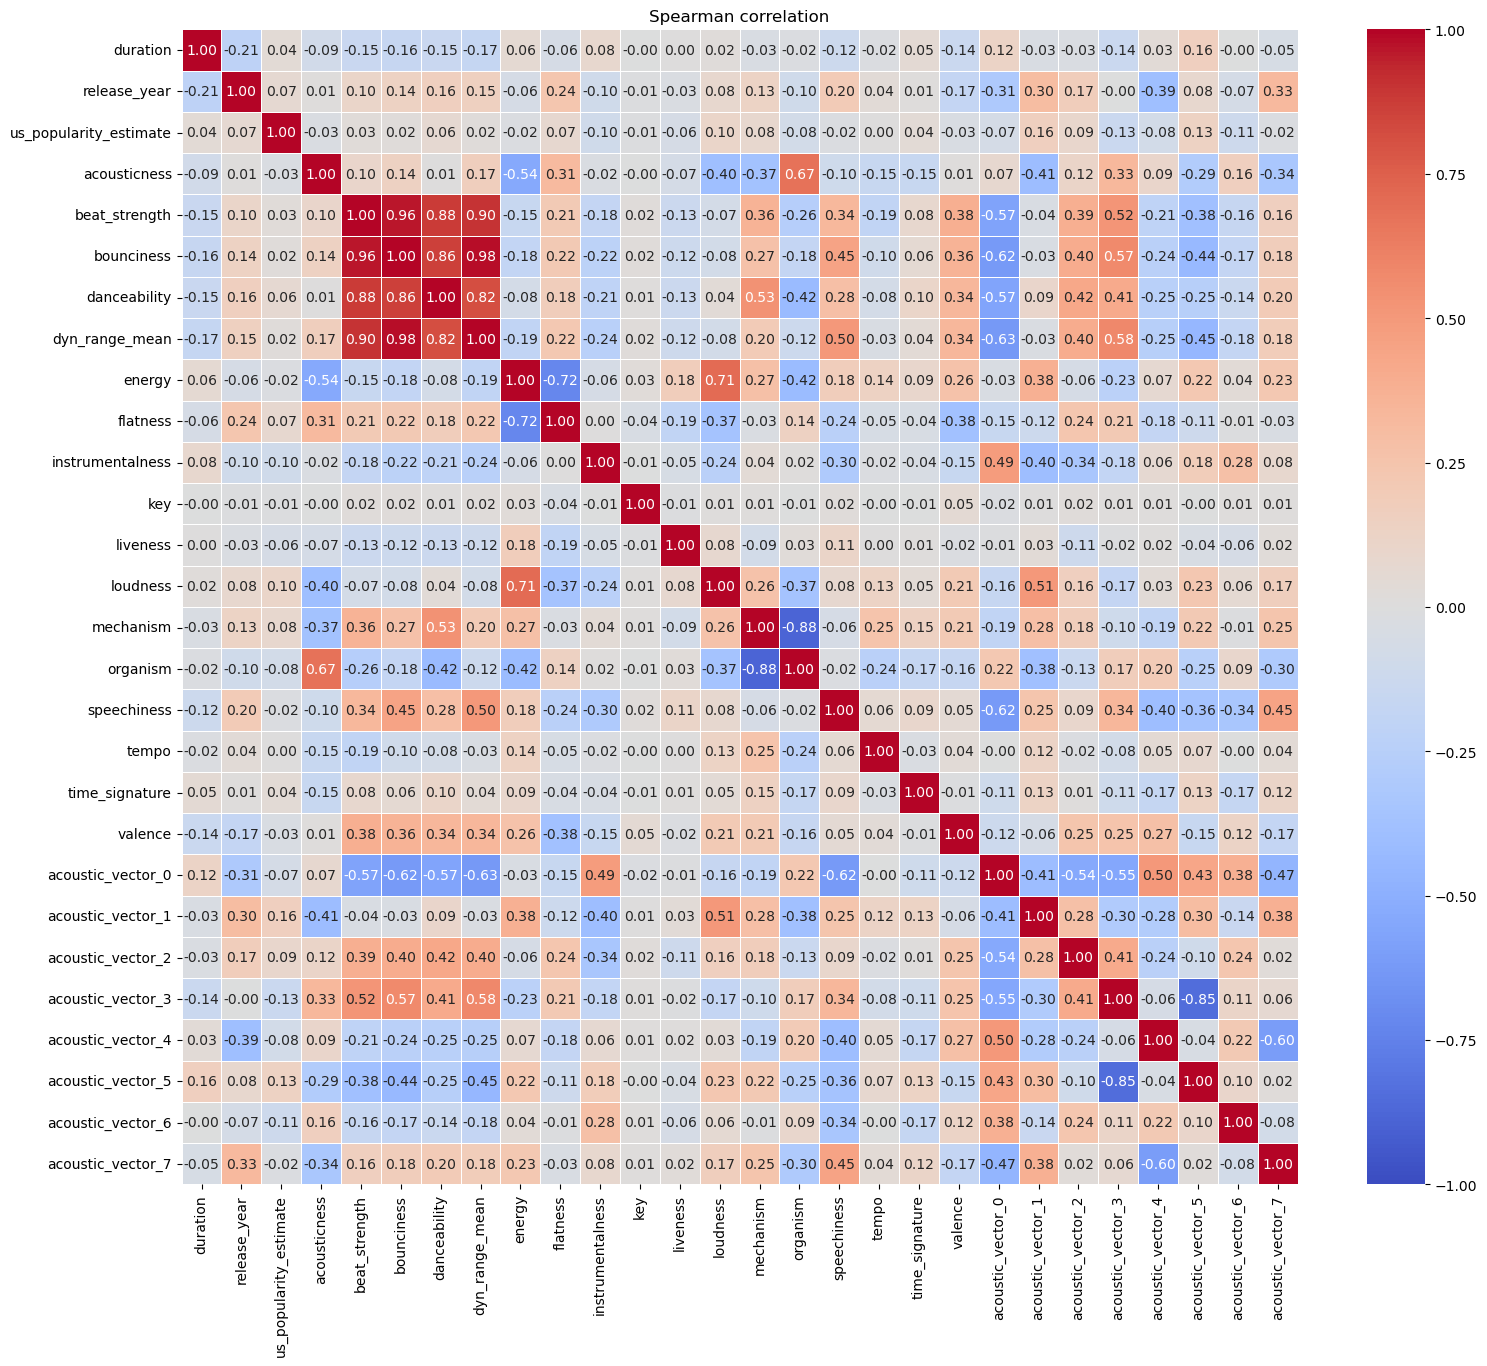

In [5]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap( tf_df.corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Spearman correlation')
plt.show()

In [6]:
df = log_df.merge(tf_df, left_on = 'track_id_clean', right_on = 'track_id')
df_dummy = pd.get_dummies(df, columns = ['hist_user_behavior_reason_end', 'hist_user_behavior_reason_start', 'context_type','key','time_signature','mode'])
df_dummy

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_major,mode_minor
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,...,0,0,0,0,0,0,1,0,1,0
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,8,20,t_c6d511e7-d986-4614-b694-ace9df48a665,True,True,True,False,0,0,...,0,1,0,0,0,0,1,0,0,1
167876,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,10,20,t_44a3360f-a06d-458a-91fc-4d9efa506697,True,True,True,False,0,0,...,0,0,0,0,0,0,1,0,0,1
167877,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,16,20,t_3f71a175-f7ca-4cd4-829d-65fc82b09486,False,False,False,True,0,1,...,0,0,0,0,0,0,1,0,1,0
167878,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,17,20,t_ac792fc0-a591-4c0f-a03c-652a97a864d2,False,False,True,False,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
df_s_mean = df_dummy.groupby(['session_id']).mean().drop(columns = ['session_position','session_length'])
df_s_mean

/var/folders/fw/slnm06yn15lgwlcg_7jpt3t00000gn/T/ipykernel_81671/3303846683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_s_mean = df_dummy.groupby(['session_id']).mean().drop(columns = ['session_position','session_length'])


,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_major,mode_minor
session_id,,,,,,,,,,,,,,,,,,,,,
0_00006f66-33e5-4de7-a324-2d18e439fc1e,0.400000,0.650000,0.700000,0.300000,0.000000,0.900000,0.050000,0.050000,0.0,0.000000,...,0.000000,0.05,0.000000,0.0,0.0,0.000000,0.900000,0.1,0.450000,0.550000
0_0000a72b-09ac-412f-b452-9b9e79bded8f,0.450000,0.500000,0.500000,0.300000,0.000000,0.800000,0.150000,0.150000,0.0,0.050000,...,0.150000,0.00,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.600000,0.400000
0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a,0.600000,0.600000,0.800000,0.100000,0.000000,0.700000,0.150000,0.250000,0.0,0.000000,...,0.050000,0.10,0.000000,0.0,0.0,0.000000,0.900000,0.1,0.400000,0.600000
0_00016a3d-9076-4f67-918f-f29e3ce160dc,0.700000,0.800000,0.800000,0.200000,0.000000,0.350000,0.600000,0.600000,0.0,0.000000,...,0.150000,0.15,0.150000,0.0,0.0,0.000000,1.000000,0.0,0.750000,0.250000
0_00018b58-deb8-4f98-ac5e-d7e01b346130,0.090909,0.090909,0.454545,0.545455,0.090909,0.818182,0.090909,0.090909,0.0,0.090909,...,0.000000,0.00,0.272727,0.0,0.0,0.000000,1.000000,0.0,0.545455,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_0eac164c-f209-4590-8608-a56e67658952,0.750000,0.750000,0.900000,0.100000,0.000000,0.900000,0.050000,0.050000,0.0,0.000000,...,0.150000,0.15,0.200000,0.0,0.0,0.050000,0.950000,0.0,0.650000,0.350000
0_0eacbee7-9868-48a0-9ab0-f86069329f50,0.850000,0.850000,0.950000,0.050000,0.000000,0.800000,0.150000,0.150000,0.0,0.100000,...,0.000000,0.00,0.150000,0.0,0.0,0.000000,1.000000,0.0,0.550000,0.450000
0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,0.550000,0.600000,0.650000,0.350000,0.000000,0.550000,0.400000,0.400000,0.0,0.000000,...,0.000000,0.10,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.650000,0.350000


In [8]:
R_skip2 = df_s_mean.corr(method='spearman')
R_skip2

,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_major,mode_minor
skip_1,1.000000,0.933606,0.821507,-0.806286,-0.209004,0.263246,-0.182276,-0.246213,-0.048833,-0.021780,...,-0.006031,0.025217,0.032193,-0.022152,-0.002484,-0.044798,0.035248,-0.004333,-0.040826,0.040826
skip_2,0.933606,1.000000,0.899528,-0.882724,-0.130029,0.239280,-0.154877,-0.223079,0.013353,-0.020819,...,0.001287,0.025370,0.032338,-0.021622,-0.000081,-0.033745,0.025641,-0.003193,-0.038250,0.038250
skip_3,0.821507,0.899528,1.000000,-0.983464,-0.025460,0.201298,-0.125650,-0.186555,0.081615,-0.012481,...,-0.011411,0.027331,0.030901,-0.028874,0.000419,-0.032534,0.028997,-0.012885,-0.045728,0.045728
not_skipped,-0.806286,-0.882724,-0.983464,1.000000,0.012587,-0.197780,0.123886,0.182341,-0.090879,0.009046,...,0.011020,-0.025252,-0.027603,0.027629,0.003089,0.030406,-0.028847,0.013761,0.040497,-0.040497
context_switch,-0.209004,-0.130029,-0.025460,0.012587,1.000000,-0.140692,0.134391,0.147061,0.154145,0.031213,...,0.011228,-0.015658,-0.029841,0.019930,0.033553,0.054124,-0.055973,0.014795,0.022512,-0.022512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
time_signature_3,-0.044798,-0.033745,-0.032534,0.030406,0.054124,-0.022467,0.040612,0.029732,-0.006093,-0.056950,...,0.067125,-0.049598,-0.052822,0.036241,0.117412,1.000000,-0.819059,0.059356,0.163385,-0.163385
time_signature_4,0.035248,0.025641,0.028997,-0.028847,-0.055973,0.014726,-0.032014,-0.022025,0.010771,0.052354,...,-0.040802,0.015343,0.039915,-0.062925,-0.336851,-0.819059,1.000000,-0.470005,-0.122834,0.122834
time_signature_5,-0.004333,-0.003193,-0.012885,0.013761,0.014795,-0.001016,0.015658,0.009226,-0.021231,-0.041410,...,-0.014102,-0.012301,0.029931,0.019772,-0.006994,0.059356,-0.470005,1.000000,-0.067357,0.067357
mode_major,-0.040826,-0.038250,-0.045728,0.040497,0.022512,-0.026257,0.028606,0.021856,-0.026673,-0.035142,...,0.019728,-0.151089,-0.177339,0.014472,0.062742,0.163385,-0.122834,-0.067357,1.000000,-1.000000


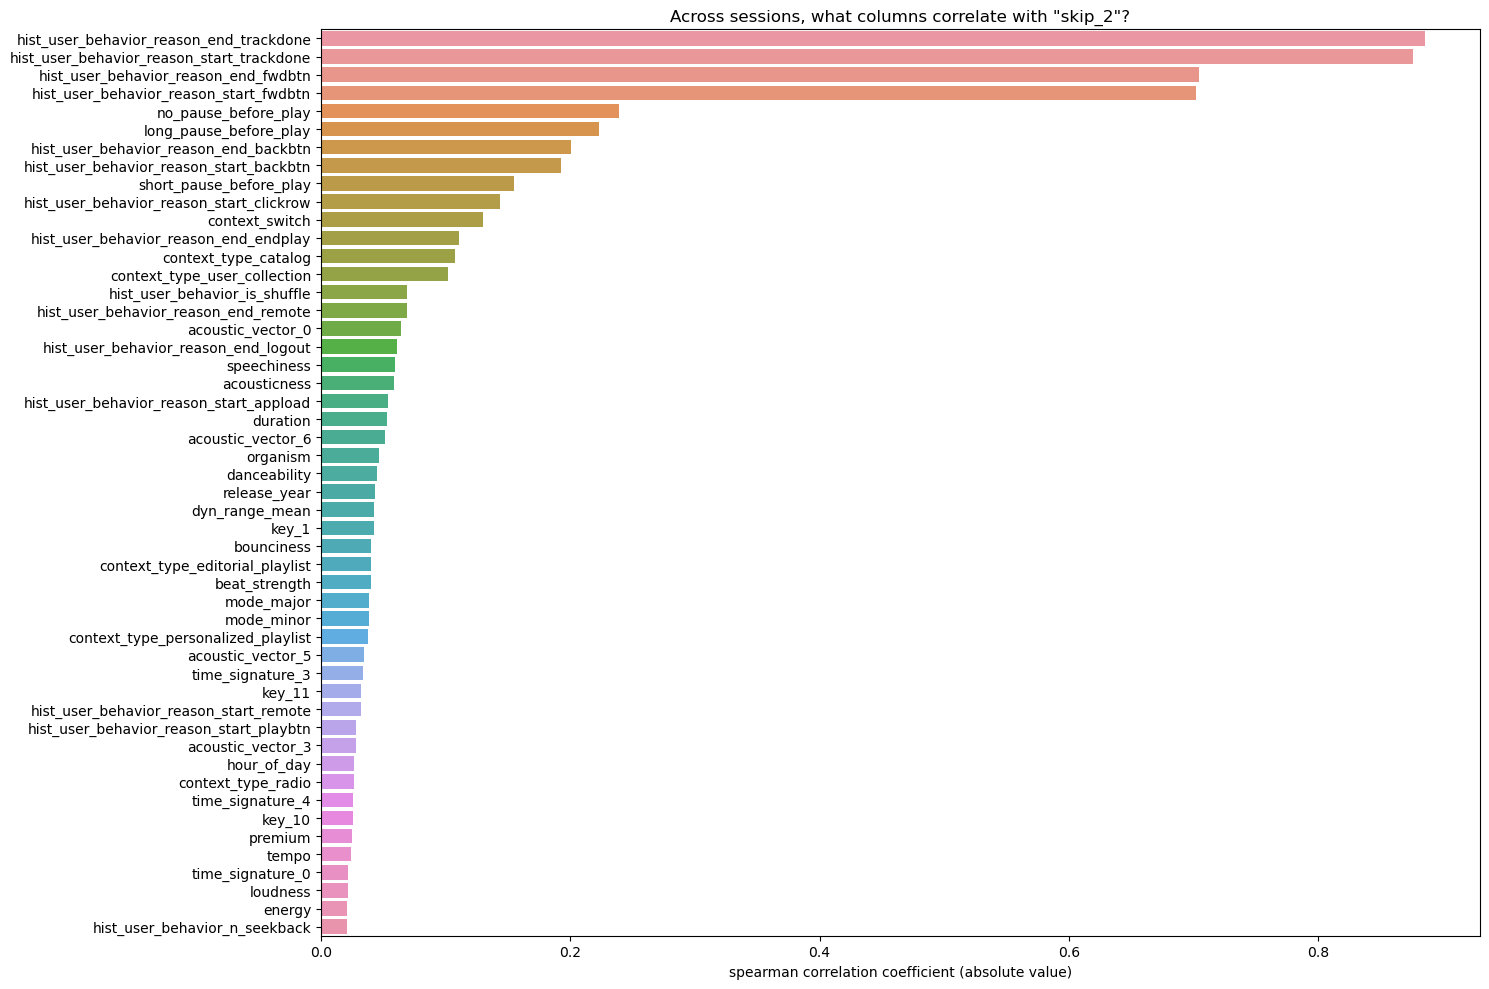

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 

sel_range = 50

R_skip2_sorted = np.abs(R_skip2['skip_2'].drop(['skip_1','skip_2','skip_3','not_skipped'])).sort_values(ascending=False)
sns.barplot(y=R_skip2_sorted[0:sel_range].index, x=R_skip2_sorted[0:sel_range], orient = 'h', ax = ax)
ax.set_xlabel('spearman correlation coefficient (absolute value)')
ax.title.set_text('Across sessions, what columns correlate with "skip_2"?')

plt.tight_layout()
plt.show()

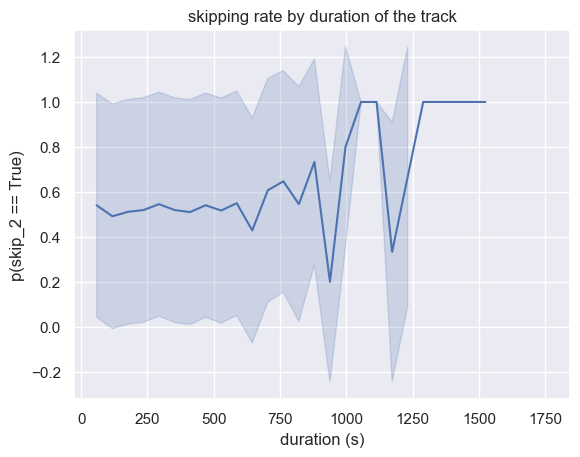

In [10]:
df_dummy['duration_cut'] = pd.cut(df_dummy['duration'],bins = 30)
dd_mean = df_dummy.groupby(['duration_cut'])['skip_2'].mean()
dd_std = df_dummy.groupby(['duration_cut'])['skip_2'].std()


sns.set()
x = pd.IntervalIndex(dd_mean.index.get_level_values('duration_cut')).mid

plt.plot(x, dd_mean, 'b-', label='mean_1')
plt.fill_between(x, dd_mean - dd_std, dd_mean + dd_std, color='b', alpha=0.2)
plt.title('skipping rate by duration of the track')
plt.xlabel('duration (s)')
plt.ylabel('p(skip_2 == True)')
plt.show()

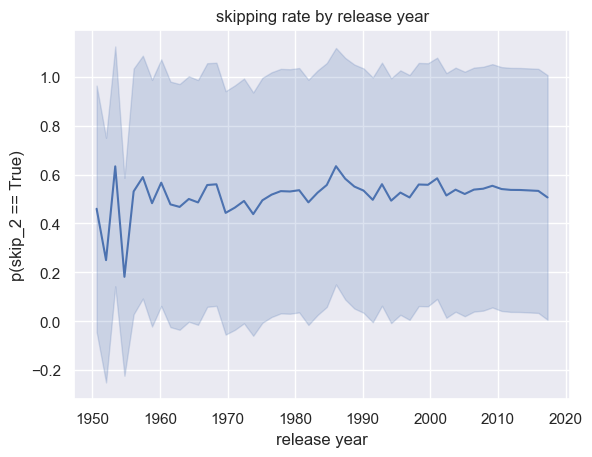

In [11]:
df_dummy['release_year_cut'] = pd.cut(df_dummy['release_year'],bins = 50)
dd_mean = df_dummy.groupby(['release_year_cut'])['skip_2'].mean()
dd_std = df_dummy.groupby(['release_year_cut'])['skip_2'].std()


sns.set()
x = pd.IntervalIndex(dd_mean.index.get_level_values('release_year_cut')).mid

plt.plot(x, dd_mean)
plt.fill_between(x, dd_mean - dd_std, dd_mean + dd_std, color='b', alpha=0.2)
plt.title('skipping rate by release year')
plt.xlabel('release year')
plt.ylabel('p(skip_2 == True)')
plt.show()

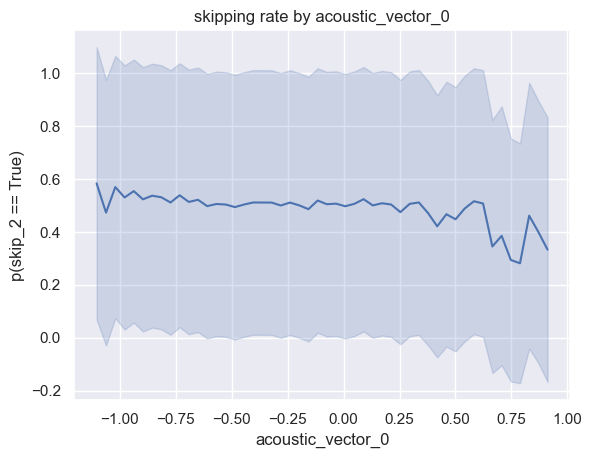

In [12]:
df_dummy['acoustic_vector_0_cut'] = pd.cut(df_dummy['acoustic_vector_0'],bins = 50)
dd_mean = df_dummy.groupby(['acoustic_vector_0_cut'])['skip_2'].mean()
dd_std = df_dummy.groupby(['acoustic_vector_0_cut'])['skip_2'].std()


sns.set()
x = pd.IntervalIndex(dd_mean.index.get_level_values('acoustic_vector_0_cut')).mid

plt.plot(x, dd_mean)
plt.fill_between(x, dd_mean - dd_std, dd_mean + dd_std, color='b', alpha=0.2)
plt.title('skipping rate by acoustic_vector_0')
plt.xlabel('acoustic_vector_0')
plt.ylabel('p(skip_2 == True)')
plt.show()